# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:

k-mean cluster mengelompokan bentuk data yang terlihat similiar menjadi sebuah cluster.

Steps:
1. Menentukan jumlah cluster (dalam hal ini `k`) yang ingin diidentifikasi dalam data.
2. Memilih random `k` titik data yang berbeda yang menjadi inisial cluster.
3. Menghitung jarak antara titik data (dari data selain inisial cluster) ke setiap `k` inisial cluster.
4. Meng-assign titik data tadi menjadi cluster dengan jarak terdekat.
5. Mengulangi langkah dari langkah ketiga sampai dengan seluruh titik data telah di-clustering.
6. Menghitung rata-rata (mean) dari setiap cluster.
7. Mengulangi langkah ketiga dan keempat tetapi dengan memakai jarak ke setiap mean cluster.

Source: <a href='https://youtu.be/4b5d3muPQmA?t=18'>StatQuest: K-means clustering</a>



---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [27]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


In [28]:
# Initial shape size and detail non-null and dtype data
print(df.shape)
df.info()

(250, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    object 
 2   Umur                        245 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        246 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [29]:
#code here
import numpy as np
import matplotlib.pyplot as plt

# df.drop('ID_pelanggan')

# Get upper and lower bound of data with q1, q2, and interquartil
# Param     : x dataframe attribute type
# Return    : list of float tuple 
def bound(x):
    # Calculate q1, q3 and interquartile
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1

    # Calculate the lower and upper bound of data
    lower_ = q1 - (iqr * 1.5)
    upper_ = q3 + (iqr * 1.5)

    return (upper_, lower_)

# Replace NaN value with last valid data
df.fillna(method='ffill', inplace=True)

# Get tuple of upper and lower bound of column Umur and Skor Belanja (1-100)
upper_umur, lower_umur = bound(df['Umur'])
upper_skor, lower_skor = bound(df['Skor Belanja (1-100)'])

In [30]:
# Get column 'Umur' and 'Skor Belanja (1-100)'
df_select = df[['Umur', "Skor Belanja (1-100)"]]

# Shape size and detail non-null and dtype data
# after handling missing value
print(df_select.shape)
df_select.info()

(250, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Umur                  250 non-null    float64
 1   Skor Belanja (1-100)  250 non-null    float64
dtypes: float64(2)
memory usage: 4.0 KB


In [31]:
# Filter outliers dataframe with interquartile

# Filter outliers in column 'Umur'
df_select = df_select[(df_select['Umur'] > lower_umur) & (df_select['Umur'] < upper_umur)]

# Filter outliers in column 'Skor Belanja (1-100)'
df_select = df_select[(df_select['Skor Belanja (1-100)'] > lower_skor) & (df_select['Skor Belanja (1-100)'] < upper_skor)]

# Shape size and detail non-null and dtype data
# after handling outliers
print(df_select.shape)
df_select.info()

(248, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 248
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Umur                  248 non-null    float64
 1   Skor Belanja (1-100)  248 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


<AxesSubplot:xlabel='Umur'>

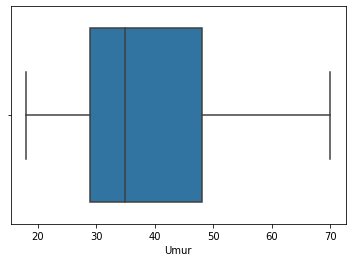

In [32]:
import seaborn as sns

# Check outliers in column 'Umur'
sns.boxplot(x='Umur', data=df_select)

<AxesSubplot:xlabel='Skor Belanja (1-100)'>

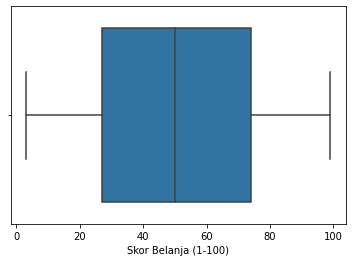

In [33]:
# Check outliers in column 'Umur'
sns.boxplot(x='Skor Belanja (1-100)', data=df_select)

In [34]:
# Rescale data with StandardScaler
from sklearn.preprocessing import StandardScaler

# Fit data scaling on dataframe
dfscale = StandardScaler().fit_transform(df_select.astype(float))

In [35]:
# 2-means clustering
from sklearn.cluster import KMeans

# Learning the data with KMeans cluster k = 2
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(dfscale)

# Get the labels from kmeans
labels2 = kmeans2.labels_

# Create new dataframe with dataframe that have been scaled and rename the column
dfclust2 = pd.DataFrame(data=dfscale, columns=['Umur', 'Skor Belanja (1-100)'])

# Add new column 'label_2' as the label of the cluster
dfclust2['label_2'] = kmeans2.labels_

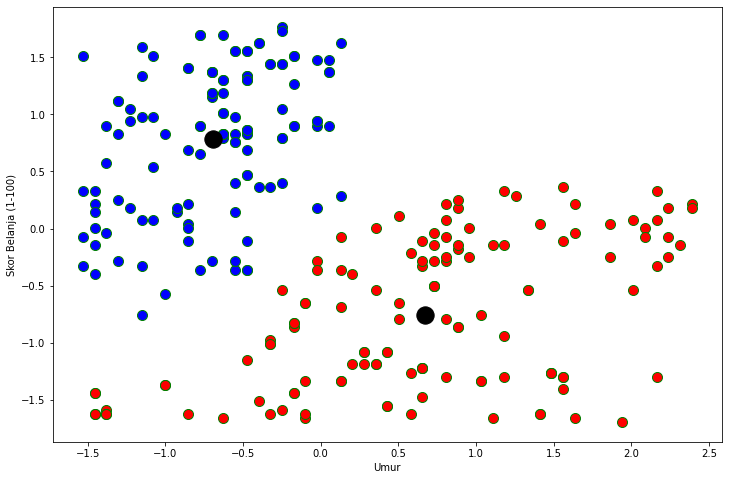

In [36]:
# Visualize the 2-Means cluster

# Create canvas
plt.figure(figsize=(12, 8))

# Plotting with scatterplot
plt.scatter(dfclust2['Umur'][dfclust2.label_2 == 0], dfclust2['Skor Belanja (1-100)'][dfclust2.label_2 == 0], c='blue', s=100, edgecolors='green')
plt.scatter(dfclust2['Umur'][dfclust2.label_2 == 1], dfclust2['Skor Belanja (1-100)'][dfclust2.label_2 == 1], c='red', s=100, edgecolors='green')

# Choose the data cluster
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c='k', s=300)

# Give x and y label in the canvas
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')

plt.show()

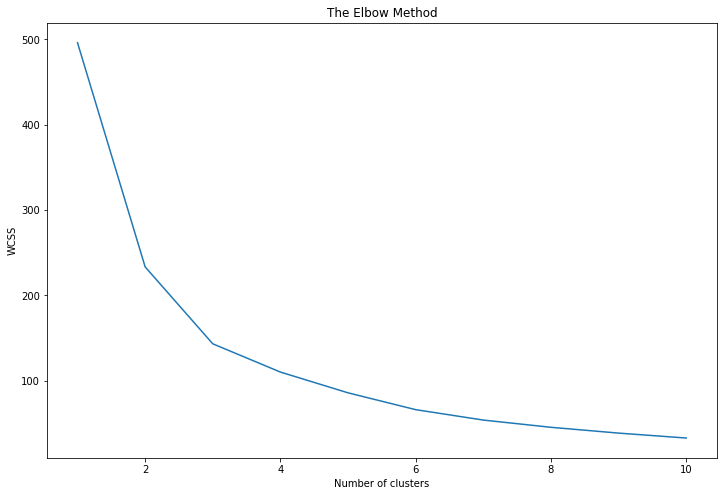

In [37]:
# Elbow method
# Create array for WCSS value
wcss = [] 

# Create i KMeans from scaled dataframe
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dfscale)

    # kmeans.inertia sum of squared distances to the closest 'centroid' 
    # for all 'observation data' in the training set
    wcss.append(kmeans.inertia_)

# Create canvas
plt.figure(figsize=(12, 8))

# Plotting the array of wcss
plt.plot(range(1, 11), wcss)

# Give the title, x label, and y label in the canvas
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [38]:
# 3-means clustering

# Learning the data with KMeans cluster k = 3
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(dfscale)

# Get the labels from kmeans
labels3 = kmeans3.labels_

# Create new dataframe with dataframe that have been scaled and rename the column
dfclust3 = pd.DataFrame(data=dfscale, columns=['Umur', 'Skor Belanja (1-100)'])

# Add new column 'label_3' as the label of the cluster
dfclust3['label_3'] = kmeans3.labels_

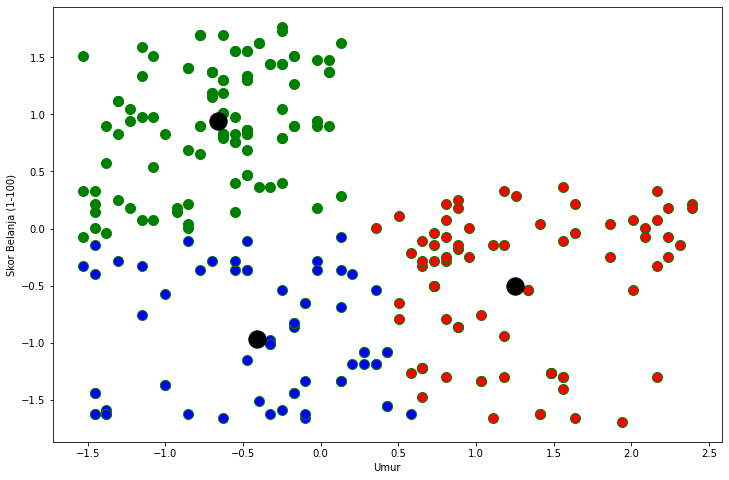

In [39]:
# Visualize the 3-Means cluster

# Create canvas
plt.figure(figsize=(12,8))

# Plotting with scatterplot
plt.scatter(dfclust3['Umur'][dfclust3.label_3 == 0], dfclust3['Skor Belanja (1-100)'][dfclust3.label_3 == 0], c='blue', s=100, edgecolors='green')
plt.scatter(dfclust3['Umur'][dfclust3.label_3 == 1], dfclust3['Skor Belanja (1-100)'][dfclust3.label_3 == 1], c='red', s=100, edgecolors='green')
plt.scatter(dfclust3['Umur'][dfclust3.label_3 == 2], dfclust3['Skor Belanja (1-100)'][dfclust3.label_3 == 2], c='green', s=100, edgecolors='green')

# Choose the data cluster
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], c='k', s=300)

# Give x and y label in the canvas
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')

plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

Kelompok pada rentang umur yang lebih tua (lebih dari rentang 0) memberikan rating skor pembelajaan kurang dari 50%.

Namun pada rentang umur yang lebih muda (kurang dari rentang 1) memberikan variasi rating yang beragam.

Kemudian untuk ketepatan dari jumlah cluster yang diberikan dapat memakai dapat dilihat dari grafik The Elbow Method dimana rentang jumlah cluster yang tepat berada pada posisi **elbow** (rentang 2 sampai 3)

> Untuk kakak pengoreksi: Gambar saya tidak jadi hiks T^T There was some bug that I couldn't handle it